# ===========================
# CNN Image Classification Project – Rice Dataset
# Skills Highlighted: CNN, Data Preprocessing, Data Augmentation, Model Evaluation
# ===========================

# Step 1: Import libraries

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array , to_categorical
from tensorflow.keras.models import Sequential


# Step 2: Path to dataset

In [64]:
path="/kaggle/input/rice-image-dataset/Rice_Image_Dataset"

# Step 3: Get class names and number of classes

In [65]:
img_classes=os.listdir(path)
num_classes = len(img_classes)
print("Classes:", img_classes)

Classes: ['Karacadag', 'Basmati', 'Jasmine', 'Rice_Citation_Request.txt', 'Arborio', 'Ipsala']


In [66]:
img_classes[1]

'Basmati'

# Step 4: Visualize one image per class

In [38]:
def first_img_from_each_class(path):
    img_classes=os.listdir(path)
    plt.figure(figsize=(12,12))
    img_classes = [category for category in img_classes if os.path.isdir(os.path.join(path, category))]

    for i , category in enumerate(img_classes):
         folderPath=path+"/"+category
         img_in_folder=os.listdir(folderPath)
         first_img=img_in_folder[0]
         first_imgArray=folderPath+"/"+first_img
         imgobject=image.load_img(first_imgArray)
         imageArray=image.img_to_array(imgobject)/255
         plt.subplot(1,len(img_classes),i+1)
         plt.imshow(imageArray)
         plt.title(category)


In [41]:
folderPath=path+"/"+category
folderPath

'/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag'

In [42]:
folderPath=os.path.join(path,category)
folderPath

'/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag'

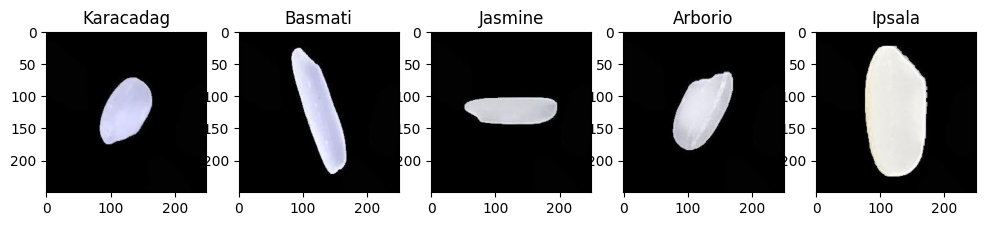

In [39]:
first_img_from_each_class(path)

# Step 5: Data generators with augmentation and validation split

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [50]:
#build cnn model
from tensorflow.keras.models import Sequential
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(64,activation="relu"),
    Dropout(0.2),
    Dense(5,activation="softmax")
    
    
    
])

In [49]:
train_data=datagen.flow_from_directory(
    path,
    target_size=(64,64),
    class_mode="categorical",
    batch_size=32,
    subset="training" 
)

test_data=datagen.flow_from_directory(
    path,
    target_size=(64,64),
    class_mode="categorical",
    batch_size=32,
    subset="validation"
)

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


# Step 6: Build CNN model

In [67]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(5, activation="softmax")
])


# Step 7: Compile model

In [54]:
model.compile(optimizer="adam"
              ,loss="categorical_crossentropy"
              ,metrics=["accuracy"])

# Step 8: Train model

In [55]:
model_history=model.fit(train_data,epochs=10,validation_data=test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1756845316.446610     145 service.cc:148] XLA service 0x7ce42400c8f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756845316.447309     145 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1756845316.773774     145 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 2:59:50 6s/step - accuracy: 0.2812 - loss: 1.6305

I0000 00:00:1756845319.454298     145 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 577s 305ms/step - accuracy: 0.8599 - loss: 0.3641 - val_accuracy: 0.9748 - val_loss: 0.0742
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 50ms/step - accuracy: 0.9656 - loss: 0.1051 - val_accuracy: 0.9880 - val_loss: 0.0366
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 93s 50ms/step - accuracy: 0.9824 - loss: 0.0550 - val_accuracy: 0.9908 - val_loss: 0.0285
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9897 - loss: 0.0342 - val_accuracy: 0.9969 - val_loss: 0.0102
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9906 - loss: 0.0304 - val_accuracy: 0.9960 - val_loss: 0.0137
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 54ms/step - accuracy: 0.9898 - loss: 0.0310 - val_accuracy: 0.9977 - val_loss: 0.0075
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - accuracy: 0.9940 - loss: 0.0208 - val_accuracy: 0.9976 - val_loss: 0.0087
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 104s 56ms/step - accuracy: 0.9945 - loss:

# Step 9: Plot Train vs Validation Loss

Text(0.5, 1.0, 'Train vs Validation Loss')

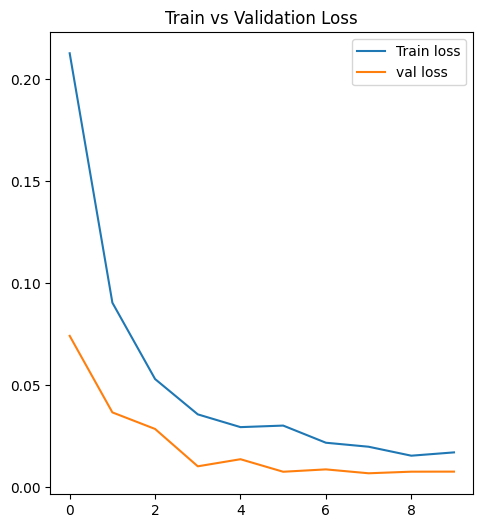

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(model_history.history["loss"],label="Train loss")
plt.plot(model_history.history["val_loss"] , label="val loss")

plt.legend()
plt.title("Train vs Validation Loss")

# Step 9: Plot Train vs Validation Accuracy

Text(0.5, 1.0, 'Train vs Validation accuracy')

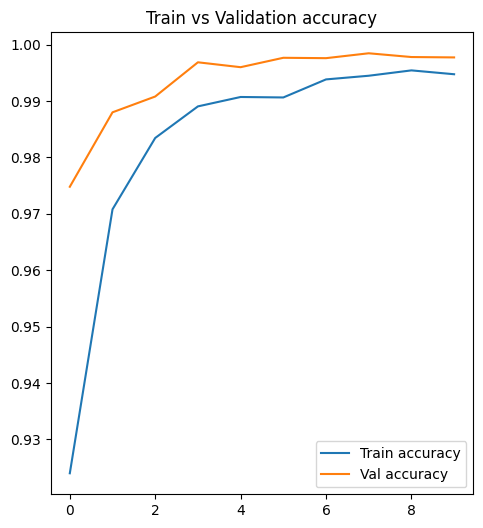

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(model_history.history["accuracy"] , label="Train accuracy")
plt.plot(model_history.history["val_accuracy"] , label="Val accuracy")


plt.legend()
plt.title("Train vs Validation accuracy")

# Step 10: Final evaluation on validation set

In [59]:
loss, acc = model.evaluate(test_data, verbose=0) 
print(f"Validation Accuracy: {acc*100:.2f}%")

Validation Accuracy: 99.77%


# Step 11: Save model

In [60]:
# Save model
model.save("/kaggle/working/rice_cnn_model.h5")
print("Model saved successfully!")

Model saved successfully!
